In [2]:
##import csv
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

ruta = "../../data/processed_data/preliminar_estadisticas/pais/estadisticas_pais.csv"

df_pais = pd.read_csv(ruta)
df_pais.head()

,Código región,Región,poblacion_total,poblacion_migrante,porcentaje
0,0,País,18480432.0,1608650.0,8.70
1,15,Arica y Parinacota,244569.0,36188.0,14.80
2,1,Tarapacá,369806.0,84935.0,22.97
3,2,Antofagasta,635416.0,124006.0,19.52
4,3,Atacama,299180.0,25167.0,8.41


In [3]:
# Cargar el shapefile (geometría de las regiones)
gdf = gpd.read_file("regiones.json")

In [11]:
gdf["name"] = gdf["name"].replace({
    "Región Metropolitana de Santiago": "Metropolitana de Santiago",
    "Bío-Bío": "Biobío",
    "Aisén del General Carlos Ibáñez del Campo": "Aysén del General Carlos Ibáñez del Campo",
    "Magallanes y Antártica Chilena": "Magallanes y de la Antártica Chilena"
})

In [12]:
gdf_reg = gdf.merge(df_pais, left_on="name", right_on="Región")

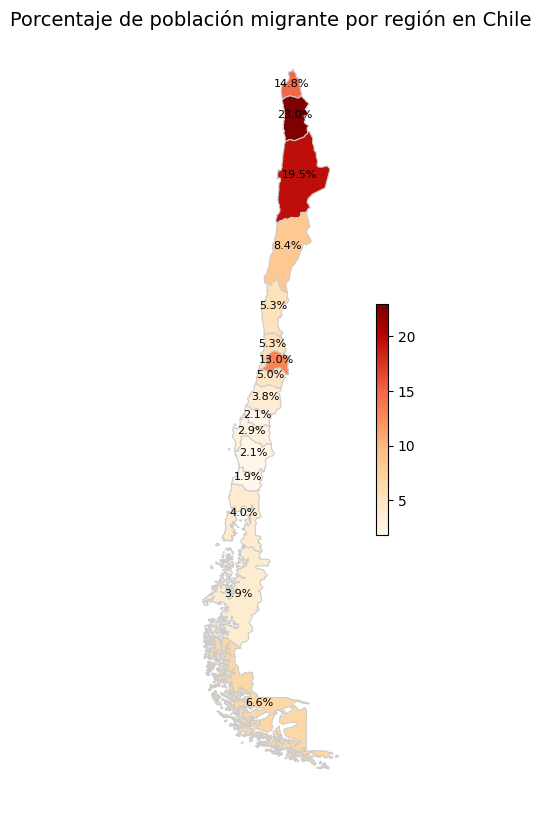

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))

gdf_reg.plot(column="porcentaje", 
         cmap="OrRd", 
         linewidth=0.8, 
         edgecolor="0.8", 
         legend=True,
         legend_kwds={"shrink": 0.3},
         ax=ax)

# Poner etiquetas con el valor en el centroide de cada región
for idx, row in gdf_reg.iterrows():
    plt.annotate(
        text=f"{round(row['porcentaje'],1)}%",
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        ha='center',
        fontsize=8,
        color="black"
    )

ax.set_title("Porcentaje de población migrante por región en Chile", fontsize=14)
ax.axis("off")
plt.show()

In [8]:
gdf["name"].unique()


array(['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Región Metropolitana de Santiago', 'Valparaíso',
       'Maule', "Libertador General Bernardo O'Higgins", 'Ñuble',
       'La Araucanía', 'Bío-Bío', 'Los Ríos', 'Los Lagos',
       'Aisén del General Carlos Ibáñez del Campo',
       'Magallanes y Antártica Chilena'], dtype=object)

In [10]:
df_pais["Región"].unique()

array(['País', 'Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Metropolitana de Santiago',
       "Libertador General Bernardo O'Higgins", 'Maule', 'Ñuble',
       'Biobío', 'La Araucanía', 'Los Ríos', 'Los Lagos',
       'Aysén del General Carlos Ibáñez del Campo',
       'Magallanes y de la Antártica Chilena'], dtype=object)

In [ ]:
v